# ECON 220 Lab - Week 12

Justin S. Eloriaga

Today, our last lesson will be on linear regression. We will discuss both bivariate and multivarate regressions as well as the use of dummy variables and the dummy variable trap

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Today, let us now revisit Card and Kreuger, i.e. the paper on minimum wages. We will be able to use this to discuss linear regression, in particular, the method of difference in differences.


In [2]:
path = "/Users/justineloriaga/Documents/GitHub/ECON-220-Lab/Week 12/CK1994.xlsx"
df = pd.read_excel(path)
df

,store,chain,co_owned,state,southj,centralj,northj,pa1,pa2,shore,...,firstinc,meals,open,hoursopen,pricesoda,pricefry,priceentree,nregisters,nregisters11,time
0,46,1,0,0,0,0,0,1,0,0,...,.,2,6.5,16.5,1.03,1.03,0.52,3,3,0
1,49,2,0,0,0,0,0,1,0,0,...,.,2,10,13,1.01,0.9,2.35,4,3,0
2,506,2,1,0,0,0,0,1,0,0,...,0.37,2,11,10,0.95,0.74,2.33,3,3,0
3,56,4,1,0,0,0,0,1,0,0,...,0.1,2,10,12,0.87,0.82,1.79,2,2,0
4,61,4,1,0,0,0,0,1,0,0,...,0.15,3,10,12,0.87,0.77,1.65,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,423,2,1,1,0,0,1,0,0,0,...,0.5,1,11,11,1.05,0.84,2.32,3,2,1
816,424,2,1,1,0,0,1,0,0,0,...,0.5,1,11,14,1.05,0.94,2.32,5,3,1
817,426,3,1,1,0,0,1,0,0,0,...,0.25,2,6,18,1.11,1.05,1.05,6,5,1
818,427,4,0,1,0,0,1,0,0,0,...,.,2,10.5,12.5,1.11,1.09,2.07,2,2,1


Again, what is the story? 

Main Question: What is the effect of New Jersey's 1992 increase of the minumum hourly minimum wage from $4.25 to $5.05. 

Classical economics: Increase in Min Wage $\rightarrow$ Decreases Employment $\rightarrow$ Increases Prices

The How? Card and Krueger (1994) surveyed a panel of 331 fast food restaurants in NJ before the enactment of the minimum wage increase AND after the enactment. Fastfood restaurants were selected for investigation as they are the major employer of minimum wage employees. 

The estimate of the change in employment is what we are after. This is called a difference estimator (difference due to a policy). But that change could be attributed to things other than or not just the policy. Moreover, estimating that change requires the counterfactual, which is something we cannot observe (unless we have a time machine)

In [3]:
df = df.sort_values(by='store')
df.head()

# Drop stores with missing empft values
df_clean = df.groupby('store').filter(lambda grp: grp['empft'].notna().all())


The $\textbf{Difference in Difference}$ estimator improves on a difference estrimator by comparing the change in the treatment sample (New Jersey) vs a control sample (Eastern Pennsylvania). 

Why is Eastern Pennsylvania a good control? Any trends or economic shocks that affect one state are likely to affect both

Let us define the full time equivalent employment which is the sum of the number of full time employees, managers and assistant managers, plus one-half of the number of part time employees

In [5]:
# Coerce empft, emppt, and nmgrs to numeric
df_clean['empft'] = pd.to_numeric(df_clean['empft'], errors='coerce')
df_clean['emppt'] = pd.to_numeric(df_clean['emppt'], errors='coerce')
df_clean['nmgrs'] = pd.to_numeric(df_clean['nmgrs'], errors='coerce')

df_clean['emp_full'] = df_clean['empft'] + df_clean['nmgrs'] + 0.5 * df_clean['emppt']
df_clean.head()

,store,chain,co_owned,state,southj,centralj,northj,pa1,pa2,shore,...,meals,open,hoursopen,pricesoda,pricefry,priceentree,nregisters,nregisters11,time,emp_full
169,1,1,0,1,0,1,0,0,0,0,...,3,7,16,0.93,0.83,0.85,4,3,0,35.0
579,1,1,0,1,0,1,0,0,0,0,...,2,7,16,1.05,0.79,0.9,4,3,1,44.0
170,2,1,0,1,0,1,0,0,0,0,...,1,7,14,1.06,0.91,0.96,2,2,0,16.0
580,2,1,0,1,0,1,0,0,0,0,...,1,7,15,1.05,1.01,0.94,2,2,1,15.5
171,3,2,0,1,0,1,0,0,0,0,...,2,11,10,1.06,0.95,3.09,5,3,0,15.5


To get some idea of the effect of the policy on employment, let $Y_{it}$ denote employment at restaurant $i$ surveyed at time $t$. Let $State_i$ be a $\textit{Dummy Variable}$ which is equal to 1 for New Jersey and 0 for Pennsylvania. Let $Time_t$ be a dummy variable indicating the time period which is 0 for the period before the policy and 1 after the policy. 

$$Y_{it} = \beta_0 + \beta_1 State_i + \beta_2 Time_t + \varepsilon_{it}$$

In [6]:
import statsmodels.api as sm
import statsmodels.formula.api as smf


# Run the regression
model = smf.ols(formula='emp_full ~ state + time', data=df_clean).fit()

# Print the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               emp_full   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.612
Date:                Wed, 16 Apr 2025   Prob (F-statistic):              0.200
Time:                        14:37:01   Log-Likelihood:                -2905.6
No. Observations:                 794   AIC:                             5817.
Df Residuals:                     791   BIC:                             5831.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.2214      0.829     26.804      0.0

We now introduce the treatment dummy. The treatment dummy is an interaction term between State and Time. All you need to do is to multiply these

In [7]:
df_clean['D'] = df_clean['time'] * df_clean['state']
df_clean.tail()

,store,chain,co_owned,state,southj,centralj,northj,pa1,pa2,shore,...,open,hoursopen,pricesoda,pricefry,priceentree,nregisters,nregisters11,time,emp_full,D
76,516,3,1,0,0,0,0,0,1,0,...,6,16,1.05,0.91,1.05,4,3,0,20.25,0
487,521,1,0,0,0,0,0,1,0,0,...,7,16,0.41,0.84,0.89,4,2,1,14.00,0
77,521,1,0,0,0,0,0,1,0,0,...,6.5,16.5,.,.,0.52,4,4,0,15.50,0
78,522,1,0,0,0,0,0,1,0,0,...,7,16,1,0.87,0.94,3,3,0,21.00,0
488,522,1,0,0,0,0,0,1,0,0,...,7,16,1,0.74,0.95,3,3,1,17.50,0


In [14]:
# Run the regression
model = smf.ols(formula='emp_full ~ state + time + D', data=df_clean).fit()

# Print the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               emp_full   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.964
Date:                Wed, 16 Apr 2025   Prob (F-statistic):              0.118
Time:                        14:43:03   Log-Likelihood:                -2904.2
No. Observations:                 794   AIC:                             5816.
Df Residuals:                     790   BIC:                             5835.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.3312      1.072     21.767      0.0

What this is effectively saying is that $$Y_{it} = 23.3 - 2.9State_i - 2.2Time_t + 2.75D_{it} + \varepsilon_{it}$$

The pre-change difference between NJ and Pennsylvania is -2.9, and the time effect is -2.3. The difference in difference effect is 2.75. Let us see how this compares to just comparing means

In [16]:
df_clean['new_state'] = df_clean['state'].apply(lambda x: "New Jersey" if x == 1 else "Pennsylvania")
df_clean['new_time'] = df_clean['time'].apply(lambda x: "Before" if x == 0 else "After")
df_clean[['state', 'new_state', 'time', 'new_time']].head()

,state,new_state,time,new_time
169,1,New Jersey,0,Before
579,1,New Jersey,1,After
170,1,New Jersey,0,Before
580,1,New Jersey,1,After
171,1,New Jersey,0,Before


In [42]:
avg_emp_table = df_clean.pivot_table(values='emp_full', index='new_time', columns='new_state', aggfunc='mean')
avg_emp_table

# Reindex the table so its "Before" then "After"
avg_emp_table = avg_emp_table.reindex(index=["Before", "After"])
avg_emp_table

# Now you try. Modify the table such that you compute the differences. 

new_state,New Jersey,Pennsylvania
new_time,,
Before,20.439408,23.331169
After,21.027429,21.165584


From here, let us see how a regression would look like graphically. I will load a much simpler dataset this time to illustrate this more simply.

In [53]:
path2 = "/Users/justineloriaga/Documents/GitHub/ECON-220-Lab/Week 12/tariff.csv"
tariff = pd.read_csv(path2, sep=';')
tariff

,Country,US 2024 Deficit,US 2024 Exports,US 2024 Imports (Customs Basis),Trump Tariffs Alleged,Trump Response,Population
0,Afghanistan,-11.1,11.4,22.6,49%,25%,41454761.0
1,Albania,13.4,141.7,128.3,10%,10%,2745972.0
2,Algeria,"-1,447.10","1,014.50","2,461.60",59%,29%,46164219.0
3,Andorra,1.5,4.9,3.4,10%,10%,80856.0
4,Angola,"-1,186.90",682.4,"1,869.20",63%,32%,36749906.0
...,...,...,...,...,...,...,...
199,Vietnam,"-123,463.00","13,098.20","136,561.20",90%,45%,100352192.0
200,West Bank Administered by Israel,-2.3,3.7,6,38%,19%,NaN
201,Yemen,125.2,134.1,8.9,10%,10%,39390799.0
202,Zambia,-55.3,113.8,169.1,33%,16%,20723965.0


Research Question: What is the effect of higher trade deficit on the US response of the tariffs?

$$US Tariff_i = \beta_0 + \beta_1 Deficit_i + \varepsilon_i$$

In [54]:
tariff.columns

# Rename the columns
tariff.columns = ['country', 'deficit', 'us_exports','us_imports','alleged_tariff','published_tariff','population']
tariff.head()

,country,deficit,us_exports,us_imports,alleged_tariff,published_tariff,population
0,Afghanistan,-11.1,11.4,22.6,49%,25%,41454761.0
1,Albania,13.4,141.7,128.3,10%,10%,2745972.0
2,Algeria,"-1,447.10","1,014.50","2,461.60",59%,29%,46164219.0
3,Andorra,1.5,4.9,3.4,10%,10%,80856.0
4,Angola,"-1,186.90",682.4,"1,869.20",63%,32%,36749906.0


In [56]:
# Convert deficit to numeric, removing commas and coercing errors
tariff_clean['deficit'] = tariff_clean['deficit'].replace(',', '', regex=True).astype(float)

# Run the regression
model_tariff_deficit = smf.ols(formula='published_tariff ~ deficit', data=tariff_clean).fit()

# Print the summary of the regression
print(model_tariff_deficit.summary())

                            OLS Regression Results                            
Dep. Variable:       published_tariff   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     12.44
Date:                Thu, 17 Apr 2025   Prob (F-statistic):           0.000520
Time:                        20:02:06   Log-Likelihood:                -763.03
No. Observations:                 204   AIC:                             1530.
Df Residuals:                     202   BIC:                             1537.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.3032      0.729     20.991      0.0

Let us now try to visualize this graphically. What do we see?

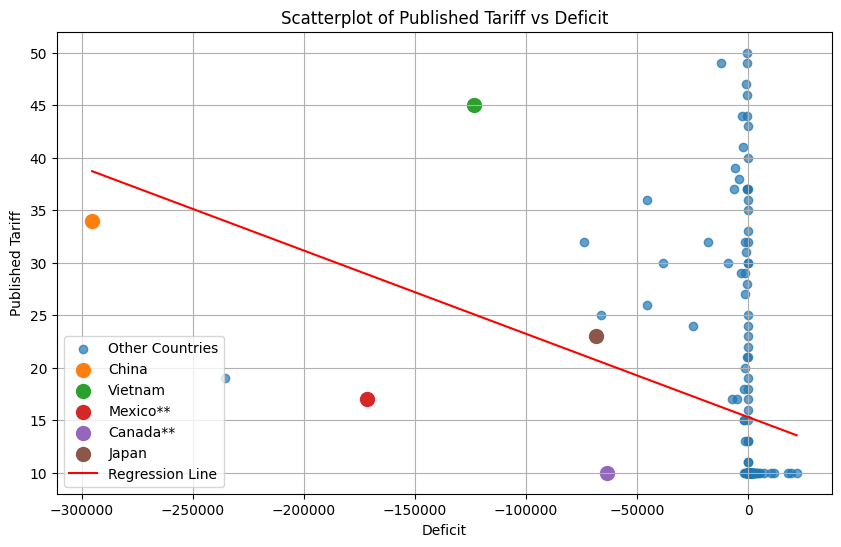

In [ ]:
# Create a scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(tariff_clean['deficit'], tariff_clean['published_tariff'], alpha=0.7, label='Other Countries')

# Highlight key countries
key_countries = ['China', 'Vietnam', 'Mexico**', 'Canada**', 'Japan']
for country in key_countries:
    country_data = tariff_clean[tariff_clean['country'] == country]
    plt.scatter(country_data['deficit'], country_data['published_tariff'], label=country, s=100)

x = np.linspace(tariff_clean['deficit'].min(), tariff_clean['deficit'].max(), 500)
y_pred = model_tariff_deficit.params['Intercept'] + model_tariff_deficit.params['deficit'] * x
plt.plot(x, y_pred, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('Deficit')
plt.ylabel('Published Tariff')
plt.title('Scatterplot of Published Tariff vs Deficit')
plt.legend()
plt.grid(True)
plt.show()